Instalação de dependências no ambiente Google Colab

In [11]:
!pip install mtcnn
!pip install opencv-python-headless

1. Importação de bibliotecas e configuração inicial

In [12]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN


2. Função para carregar e exibir imagens

In [13]:
def load_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def display_image(image, title="Imagem"):
    plt.imshow(image)
    plt.axis("off")
    plt.title(title)
    plt.show()

3. Detecção Facial com MTCNN

In [14]:
def detect_faces(image):
    detector = MTCNN()
    detections = detector.detect_faces(image)

    for detection in detections:
        x, y, width, height = detection['box']
        confidence = detection['confidence']

        if confidence > 0.9:  # Apenas exibir rostos com confiança > 90%
            cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)
            cv2.putText(image, f"Conf: {confidence:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    return image, detections


4. Função para reconhecimento facial (com embeddings)

In [15]:
def recognize_faces(image, detections, model_path):
    recognizer = load_model(model_path, safe_mode=True)
    face_embeddings = []

    for detection in detections:
        x, y, width, height = detection['box']
        face = image[y:y + height, x:x + width]
        face = cv2.resize(face, (160, 160))
        face = face.astype('float32') / 255.0
        face = np.expand_dims(face, axis=0)

        embedding = recognizer.predict(face)
        face_embeddings.append(embedding)

    return face_embeddings

5. Integração: Detecção e Reconhecimento

In [16]:
def process_image(image_path, model_path):
    image = load_image(image_path)
    display_image(image, title="Imagem Original")

    detected_image, detections = detect_faces(image)
    display_image(detected_image, title="Detecção Facial")

    if detections:
        embeddings = recognize_faces(image, detections, model_path)
        print("Embeddings Gerados:")
        for i, embedding in enumerate(embeddings):
            print(f"Face {i + 1}: {embedding.flatten()[:5]}...")  # Exibir primeiros 5 valores do embedding

6. Execução Principal

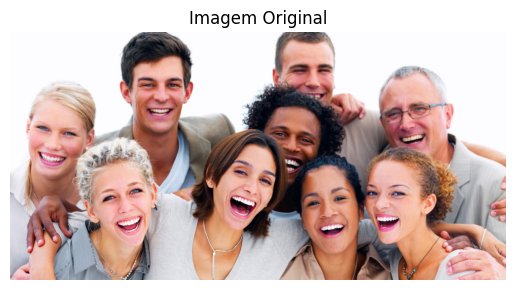

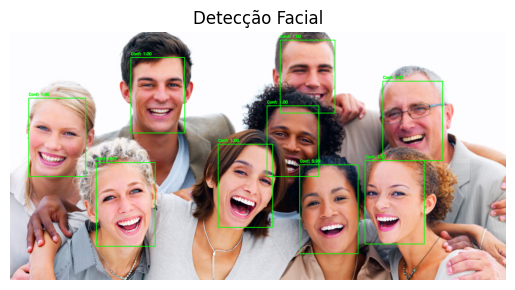

ValueError: bad marshal data (unknown type code)

In [17]:
if __name__ == "__main__":
    # Substitua pelos caminhos reais
    IMAGE_PATH = "/content/sample_data/pessoas.jpg"
    MODEL_PATH = "/content/sample_data/facenet_keras.h5"

    process_image(IMAGE_PATH, MODEL_PATH)